In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from collections import namedtuple
import warnings
warnings.filterwarnings('ignore')  # don't print out warnings

# 探索的分析

In [2]:
data = pd.read_csv("data.csv", encoding="shift-jis")
print("sample number:\t\t", data.shape[0])
print("variable number:\t", data.shape[1])

sample number:		 776
variable number:	 17


- rent	:	家賃（月当たり，円）
- arrival_time	:	バス乗車時間（最寄り駅から，分）
- walk_time	:	徒歩時間（最寄り駅または最寄りバス停から，分）
- deposit_key_mony	:	敷金礼金（合計月数）
- exclusive_area	:	専有面積（平方メートル）
- building_age	:	築年数（年）
- is_second_floor	:	部屋は１階か２階か（0：１階，１：２階）
- have_air_conditioned	:	空調の有無（0：無，1：有）
- have_storage	:	収納の有無（0：無，1：有）
- have_flooring	:	フローリングの有無（0：無，1：有）
- hava_balcony	:	バルコニーの有無（0：無，1：有）
- time_to_shinjyuku	:	新宿からの列車時間（分）
- transfer_num	:	乗換路線数
- from_express_train_num	:	急行停車駅からの駅数
- fare	:	運賃（新宿からの片道運賃，円）
- distance_to_shinjyuku	:	新宿からの距離（km）
- station_name	:	駅名

In [3]:
def missing_value_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100*mis_val/len(df)
    table = pd.DataFrame({'mis_val': mis_val, 'percent': mis_val_percent})
    table = table[table.iloc[:, 1] != 0]
    if table.shape[0] == 0:
        print("no missing value")
    else:
        return table

In [4]:
missing_value_table(data)

no missing value


In [5]:
def feature_summary(df_fa):
    print('DataFrame shape')
    print('rows: ', df_fa.shape[0])
    print('cols: ', df_fa.shape[1])
    col_list = ['Null', 'Unique_Count', 'Data_type', 'Mean', 'Median', 'Std', 'Skewness', 'Sample_values']
    df = pd.DataFrame(index=df_fa.columns, columns=col_list)
    
    df['Null'] = list([len(df_fa[col][df_fa[col].isnull()]) for i, col in enumerate(df_fa.columns)])
    df['Unique_Count'] = list([len(df_fa[col].unique()) for i, col in enumerate(df_fa.columns)])
    df['Data_type'] = list([df_fa[col].dtype for i, col in enumerate(df_fa.columns)])
    
    for i, col in enumerate(df_fa.columns):
        if 'float' in str(df_fa[col].dtype) or 'int' in str(df_fa[col].dtype):
            df.at[col, 'Mean'] = df_fa[col].mean()
            df.at[col, 'Median'] = df_fa[col].median()
            df.at[col, 'Std'] = df_fa[col].std()
            df.at[col, 'Skewness'] = df_fa[col].skew()
        df.at[col, 'Sample_values'] = list(df_fa[col].unique())
    return df.fillna('-')

In [6]:
feature_summary(data)

DataFrame shape
rows:  776
cols:  17


,Null,Unique_Count,Data_type,Mean,Median,Std,Skewness,Sample_values
rent,0,117,int64,70236.8,67250,19910.6,2.29561,"[70000, 79000, 90000, 96000, 98000, 65000, 800..."
arrival_time,0,8,int64,0.248711,0,1.91396,8.43602,"[0, 8, 15, 13, 6, 10, 14, 20]"
walk_time,0,20,int64,7.40335,7,3.95764,0.615889,"[1, 6, 5, 2, 7, 8, 4, 3, 10, 9, 13, 15, 11, 12..."
deposit_key_mony,0,10,float64,3.3607,4,0.875878,-0.802297,"[4.0, 5.0, 3.0, 6.0, 2.0, 4.5, 1.0, 0.0, 0.4, ..."
exclusive_area,0,373,float64,20.4244,19.8,4.96211,2.04852,"[16.42, 19.68, 19.0, 19.44, 18.23, 22.88, 18.6..."
building_age,0,24,int64,6.01546,6,4.10504,0.939394,"[10, 7, 6, 0, 11, 8, 4, 9, 2, 12, 3, 1, 21, 5,..."
is_second_floor,0,2,int64,0.635309,1,0.481654,-0.563305,"[0, 1]"
have_air_conditioned,0,2,int64,0.796392,1,0.402941,-1.47494,"[0, 1]"
have_storage,0,2,int64,0.765464,1,0.423982,-1.25548,"[0, 1]"
have_flooring,0,2,int64,0.447165,0,0.497521,0.212942,"[0, 1]"


In [7]:
def plot_heatmap(df, title):
    colormap = plt.cm.RdBu
    plt.figure(figsize=(14,12))
    plt.title(title, y=1.05, size=15)
    sns.heatmap(df.select_dtypes(exclude=['object']).corr(),linewidths=0.1, vmin=-1.0, vmax=1.0, center=0,
                square=True, cmap=colormap, linecolor='white', annot=True)

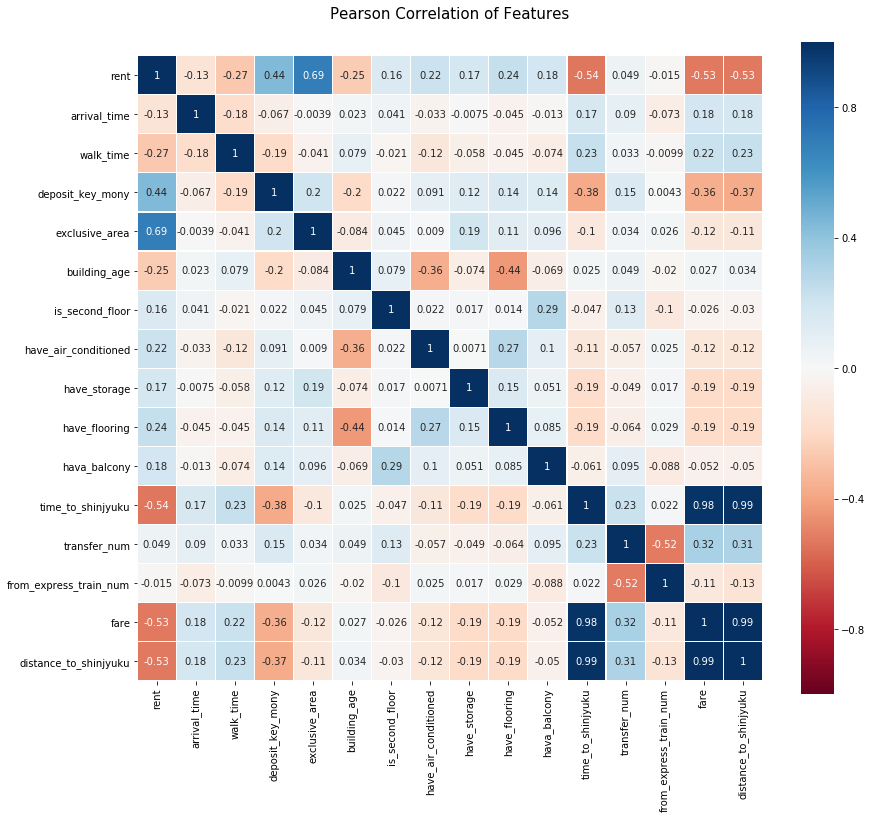

In [8]:
plot_heatmap(df=data, title='Pearson Correlation of Features')

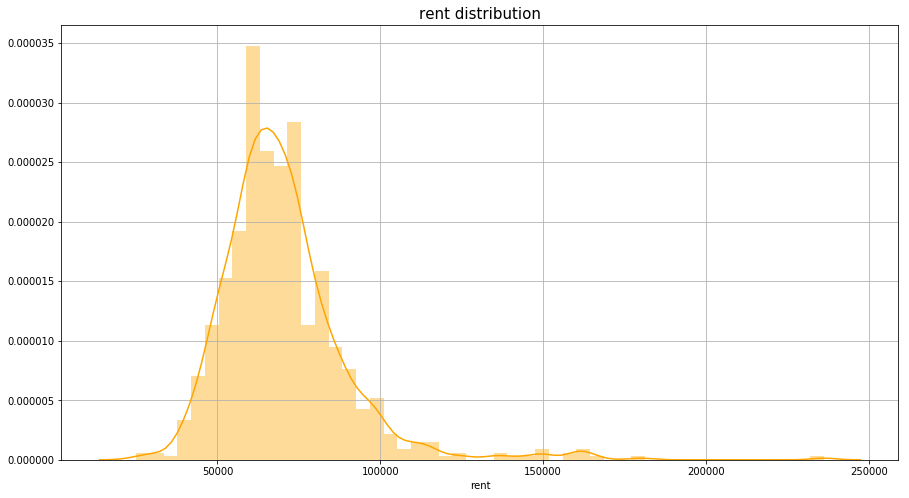

In [9]:
fig, axes = plt.subplots(figsize=(15,8))
sns.distplot(data["rent"], color='orange', ax=axes)
axes.set_title('rent distribution', fontsize=15)
axes.grid(True)
plt.show()

In [10]:
data[["is_second_floor", "rent"]].groupby(['is_second_floor'],
                                              as_index=False).mean().sort_values(by='rent', ascending=False)

,is_second_floor,rent
1,1,72579.918864
0,0,66154.911661


In [11]:
data[["have_air_conditioned", "rent"]].groupby(['have_air_conditioned'],
                                              as_index=False).mean().sort_values(by='rent', ascending=False)

,have_air_conditioned,rent
1,1,72423.689320
0,0,61682.911392


In [12]:
data[["have_storage", "rent"]].groupby(['have_storage'],
                                              as_index=False).mean().sort_values(by='rent', ascending=False)

,have_storage,rent
1,1,72141.986532
0,0,64018.681319


In [13]:
data[["have_flooring", "rent"]].groupby(['have_flooring'],
                                              as_index=False).mean().sort_values(by='rent', ascending=False)

,have_flooring,rent
1,1,75590.028818
0,0,65906.759907


In [14]:
data[["hava_balcony", "rent"]].groupby(['hava_balcony'],
                                              as_index=False).mean().sort_values(by='rent', ascending=False)

,hava_balcony,rent
1,1,72803
0,0,65023


In [15]:
data[["transfer_num", "rent"]].groupby(['transfer_num'],
                                              as_index=False).mean().sort_values(by='rent', ascending=False)

,transfer_num,rent
1,2,82802.127660
0,1,67498.925144
2,3,56268.656716


In [16]:
data[["from_express_train_num", "rent"]].groupby(['from_express_train_num'],
                                              as_index=False).mean().sort_values(by='rent', ascending=False)

,from_express_train_num,rent
6,6,76691.489362
0,0,73879.365079
4,4,72462.264151
5,5,72005.555556
3,3,68299.423077
1,1,65645.161290
2,2,62393.750000


外れ値控除

In [17]:
def detect_outliers_by_IQR(df,features):
    Q1 = np.percentile(df[features],25)
    Q3 = np.percentile(df[features],75)
    IQR = Q3 - Q1
    outlier_step = 1.5 * IQR
    outliers_data = df[(df[features] < Q1 - outlier_step) | (df[features] > Q3 + outlier_step )]
    outliers_id = df[(df[features] < Q1 - outlier_step) | (df[features] > Q3 + outlier_step )].index
    normal_data = df.loc[~df.index.isin(outliers_id)]
    result = namedtuple('result', 'outliers_id, outlier_data, nornal_value')
    return result(outliers_id=outliers_id, outlier_data=outliers_data, nornal_value=normal_data)

In [18]:
data_Outliers = detect_outliers_by_IQR(df=data, features="rent")
print('outliers numbers: \t', data_Outliers.outlier_data.shape[0])
print('normal value numbers: \t', data_Outliers.nornal_value.shape[0]) # Show the normal value shape
data_otl = data_Outliers.nornal_value

outliers numbers: 	 35
normal value numbers: 	 741


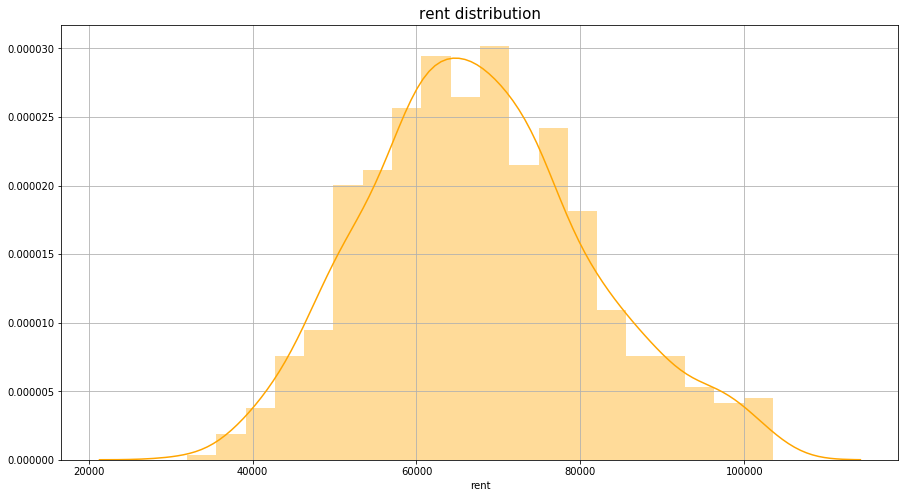

In [19]:
fig, axes = plt.subplots(figsize=(15,8))
sns.distplot(data_otl["rent"], color='orange', ax=axes)
axes.set_title('rent distribution', fontsize=15)
axes.grid(True)
plt.show()

# 回帰分析

In [20]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [21]:
fit_ols_lg_otl = smf.ols("np.log(rent) ~ exclusive_area + is_second_floor + distance_to_shinjyuku +"\
                  "have_air_conditioned + have_storage + have_flooring + hava_balcony", data=data_otl).fit()
print(fit_ols_lg_otl.summary())

                            OLS Regression Results                            
Dep. Variable:           np.log(rent)   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     201.3
Date:                Tue, 18 Dec 2018   Prob (F-statistic):          5.50e-166
Time:                        00:39:48   Log-Likelihood:                 523.20
No. Observations:                 741   AIC:                            -1030.
Df Residuals:                     733   BIC:                            -993.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                10.74

In [22]:
fit_ols_lg = smf.ols("np.log(rent) ~ exclusive_area + is_second_floor + distance_to_shinjyuku +"\
                  "have_air_conditioned + have_storage + have_flooring + hava_balcony", data=data).fit()
print(fit_ols_lg.summary())

                            OLS Regression Results                            
Dep. Variable:           np.log(rent)   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     299.7
Date:                Tue, 18 Dec 2018   Prob (F-statistic):          9.82e-215
Time:                        00:39:48   Log-Likelihood:                 480.39
No. Observations:                 776   AIC:                            -944.8
Df Residuals:                     768   BIC:                            -907.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                10.63

In [23]:
fit_ols_otl = smf.ols("rent ~ exclusive_area + is_second_floor + distance_to_shinjyuku +"\
                  "have_air_conditioned + have_storage + have_flooring + hava_balcony", data=data_otl).fit()
print(fit_ols_otl.summary())

                            OLS Regression Results                            
Dep. Variable:                   rent   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     207.8
Date:                Tue, 18 Dec 2018   Prob (F-statistic):          2.69e-169
Time:                        00:39:48   Log-Likelihood:                -7698.7
No. Observations:                 741   AIC:                         1.541e+04
Df Residuals:                     733   BIC:                         1.545e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              4.168e+

In [24]:
fit_ols = smf.ols("rent ~ exclusive_area + is_second_floor + distance_to_shinjyuku +"\
                  "have_air_conditioned + have_storage + have_flooring + hava_balcony", data=data).fit()
print(fit_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                   rent   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     291.7
Date:                Tue, 18 Dec 2018   Prob (F-statistic):          1.82e-211
Time:                        00:39:48   Log-Likelihood:                -8278.9
No. Observations:                 776   AIC:                         1.657e+04
Df Residuals:                     768   BIC:                         1.661e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              2.307e+

In [25]:
# compare
para_log_otl = fit_ols_lg_otl.params
para_log = fit_ols_lg.params
para_otl = fit_ols_otl.params
para_ = fit_ols.params
parameters = pd.DataFrame({'log_otl':para_log_otl, 'log': para_log, 'otl':para_otl, 'para': para_})
parameters

,log,log_otl,otl,para
Intercept,10.637249,10.747339,41682.955099,23065.795185
exclusive_area,0.027497,0.021891,1570.768841,2536.389535
is_second_floor,0.038743,0.029089,2206.099607,3869.704999
distance_to_shinjyuku,-0.016074,-0.015110,-977.795749,-1061.980168
have_air_conditioned,0.095233,0.077304,5110.118980,6840.069897
have_storage,-0.017824,-0.013029,-1343.526885,-1916.690928
have_flooring,0.034730,0.036271,2673.151509,2020.870047
hava_balcony,0.046732,0.045601,2838.434429,2464.352962


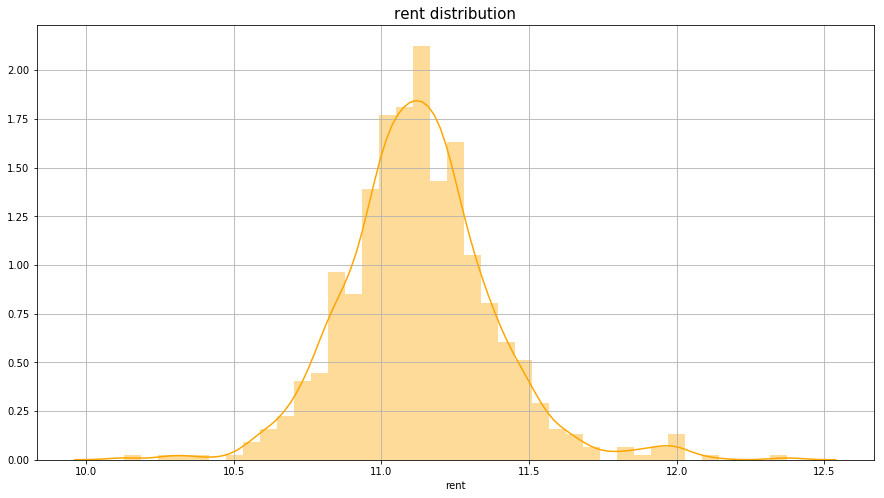

In [26]:
fig, axes = plt.subplots(figsize=(15,8))
sns.distplot(np.log(data["rent"]), color='orange', ax=axes)
axes.set_title('rent distribution', fontsize=15)
axes.grid(True)
plt.show()